In [1]:
import pandas as pd
import requests
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
links= ['https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+JOSE&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SANTA+CLARA&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SUNNYVALE&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=MOUNTAIN+VIEW&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=CUPERTINO&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=MENLO+PARK&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=PALO+ALTO&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=REDWOOD+CITY&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+MATEO&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SAN+FRANCISCO&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SEATTLE&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=REDMOND&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=SANTA+MONICA&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=LOS+ANGELES&year=All+Years',
        'https://h1bdata.info/index.php?em=&job=Data+Scientist&city=AUSTIN&year=All+Years',
        'https://h1bdata.info/index.php?em=amazon&job=Data+Scientist+I&city=&year=All+Years']

In [14]:
# Scrap table data from each of the above links and store it in a list
jobs_list = []
for link in links:
    page_link= link
    page_response= requests.get(page_link, timeout= 1000)
    page_content= BeautifulSoup(page_response.content,"lxml")
    for row in page_content.find_all("tr")[1:]:
        row_data= []
        for i in row:
            row_data.append(i.text)
        jobs_list.append(row_data)

In [31]:
ds_jobs= pd.DataFrame()
ds_jobs["company"]= [i[0] for i in jobs_list]
ds_jobs["title"]= [i[1] for i in jobs_list]
ds_jobs["salary"]= [i[2].replace(",","") for i in jobs_list]
ds_jobs["salary"]= ds_jobs["salary"].astype(float)
ds_jobs["location"]= [i[3] for i in jobs_list]
ds_jobs["date"]= [i[4] for i in jobs_list]
ds_jobs["date"]= pd.to_datetime(ds_jobs["date"])
ds_jobs["year"]= [i.year for i in ds_jobs["date"]]
## Dropping the data before 2014
ds_jobs.drop(ds_jobs[ds_jobs.year<2014].index,axis=0, inplace= True)
## Drop the salaries over $10,00,000 
ds_jobs.drop(ds_jobs[ds_jobs.salary>1000000].index, axis=0, inplace= True)
## Sort the data by company and year
ds_jobs.sort_values(by= ["year", "company"], inplace= True,ascending= True)
                  

In [32]:
ds_jobs.head()

,company,title,salary,location,date,year
2054,AIRBNB INC,DATA SCIENTIST,160000.0,"SAN FRANCISCO, CA",2014-09-26,2014
804,AYASDI INC,DATA SCIENTIST,130000.0,"MENLO PARK, CA",2014-10-09,2014
937,AYASDI INC,DATA SCIENTIST,155000.0,"MENLO PARK, CA",2014-11-20,2014
1235,BANJO INC,DATA SCIENTIST,130000.0,"REDWOOD CITY, CA",2014-11-13,2014
575,BLUE JEANS NETWORK INC,DATA SCIENTIST,107000.0,"MOUNTAIN VIEW, CA",2014-12-10,2014


In [33]:
data= ds_jobs.copy()

Text(0.5,1,'Salary Inc/dec')

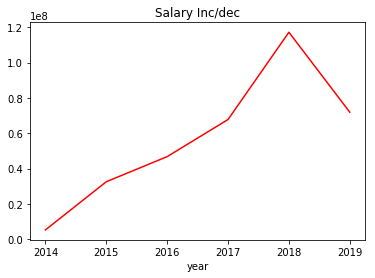

In [40]:
data.groupby("year")["salary"].sum().plot(color="r")
plt.title("Salary Inc/dec")

Text(0.5,1,'Median salary overview')

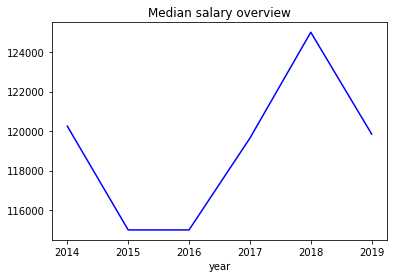

In [45]:
data.groupby("year")["salary"].median().plot(color="b")
plt.title("Median salary overview")

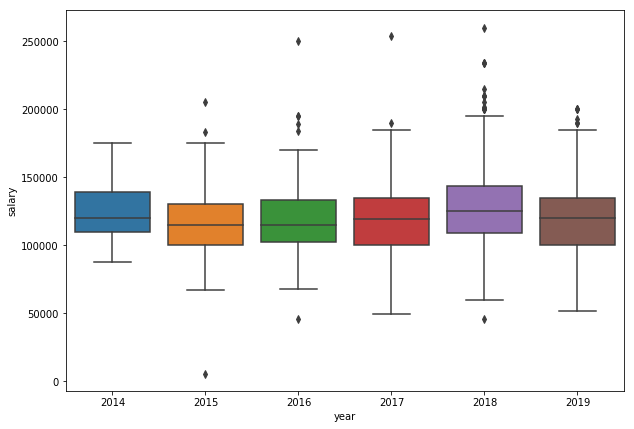

In [49]:
plt.figure(figsize=(10,7))
sns.boxplot(data["year"], data["salary"])

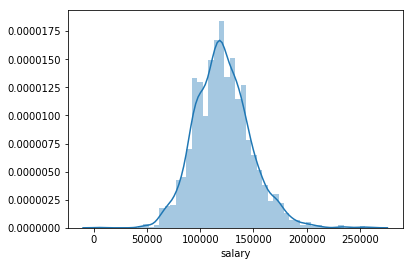

In [50]:
sns.distplot(data["salary"])

In [80]:
data.groupby("company")["saues(ascending= Fals

company
JINGCHI CORP                               205000.0
TASTEMADE INC                              195000.0
NAUTO INC                                  180000.0
PEEL TECHNOLOGIES INC                      175000.0
KEEP TRUCKIN INC                           170000.0
CONFLUENT INC                              170000.0
ZENPAYROLL INC                             170000.0
BAIDU USA LLC                              167900.0
XACTLY CORPORATION                         161481.0
TWILIO INC                                 160000.0
POSHMARK INC                               160000.0
ELANCE-ODESK INC                           160000.0
SUMO LOGIC INC                             160000.0
OPENTABLE INC                              160000.0
ARIMO LLC                                  160000.0
ARIMO INC                                  159484.0
AIRBNB INC                                 158255.0
MIST SYSTEMS INC                           158163.0
JDCOM AMERICAN TECHNOLOGIES CORPORATION    156924.0
STRI

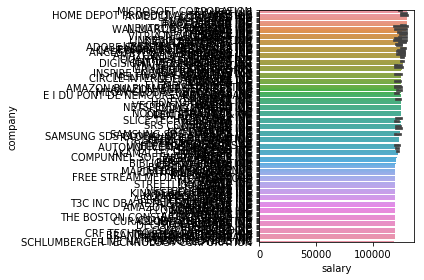

In [93]:
n_d= data.sort_values(by="salary",ascending=False)
comp= n_d["company"][1000:1500]
sal= n_d["salary"][1000:1500]
sns.barplot(sal, comp)
plt.tight_layout()